In [1]:
import json
import os
import shutil
import time
from base64 import b64decode
from io import BytesIO
from pathlib import Path

import PIL
from IPython import get_ipython
from IPython.core.magic import register_cell_magic
from manim import *

params = " -v WARNING -r 80,40 -s  --disable_caching Example"
params = f" -v WARNING -r {80*4},{40*4} -s  --disable_caching Example"

name_snippet_pairs = {}

@register_cell_magic
def capture_png(line, cell):
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )
    out_paths = line.strip().split(' ')
    for output in result.outputs:
        display(output)
        data = output.data
        if 'image/png' in data:
            path = out_paths.pop(0)
            path = path.split(".png")[0] + str(time.time_ns()) + ".png"
            if not path:
                raise ValueError('Too few paths given!')
            png_bytes = data['image/png']
            if isinstance(png_bytes, str):
                png_bytes = b64decode(png_bytes)
            assert isinstance(png_bytes, bytes)
            bytes_io = BytesIO(png_bytes)
            image = PIL.Image.open(bytes_io)
            image.save(path, 'png')
        
temp_path = Path.cwd() / "temp"
temp_path.mkdir(parents=False, exist_ok=True)

Manim Community v0.13.0

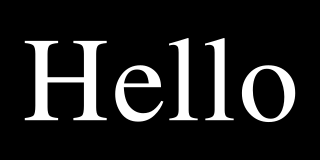

In [2]:
%%capture_png temp/example.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Text("Hello", color=WHITE)
        self.add(mob)
        self.camera.frame.scale(1/8)

###******        
image_full_name = "Text1.png"
snippet = 'mob = Text("Hello", color=WHITE)'
name_snippet_pairs[image_full_name] = snippet

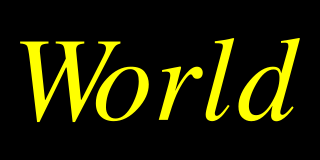

In [3]:
%%capture_png temp/example.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Text("World", color=YELLOW,slant=ITALIC)
        self.add(mob)
        self.camera.frame.scale(1/8)
###******       
image_full_name = "Text2.png"
snippet = 'mob = Text("World", color=YELLOW,slant=ITALIC)'
name_snippet_pairs[image_full_name] = snippet

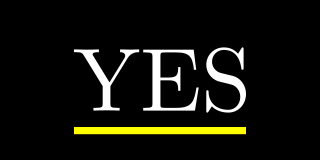

In [4]:
%%capture_png temp/example.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        t = Tex("YES")
        ul = Underline(t, color=YELLOW)
        self.add(t, ul)
        self.camera.frame.scale(1/8)
###******        
image_full_name = "Underline.png"
snippet = 't = Tex("YES")\nul = Underline(t, color=YELLOW)'
name_snippet_pairs[image_full_name] = snippet

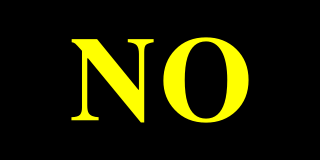

In [5]:
%%capture_png temp/example.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Text("NO", color=YELLOW,weight=BOLD)
        self.add(mob)
        self.camera.frame.scale(1/8)
###******       
image_full_name = "Bold.png"
snippet = 'mob = Text("NO", color=YELLOW,weight=BOLD)'
name_snippet_pairs[image_full_name] = snippet

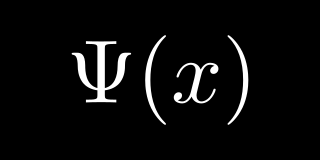

In [6]:
%%capture_png temp/example.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = MathTex(r"\Psi(x)", color=WHITE)
        self.add(mob)
        self.camera.frame.scale(1/8)
###******        
image_full_name = "MathTex.png"
snippet = 'mob = MathTex(r"\Psi(x)", color=WHITE)'
name_snippet_pairs[image_full_name] = snippet

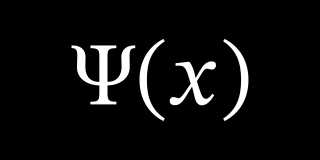

In [7]:
%%capture_png temp/example.png
%%manim $params

class Example(ZoomedScene):
    def construct(self):
        stix2 = TexTemplate()
        stix2.add_to_preamble(r"\usepackage{stix2}", prepend= True)
        MathTex.set_default(tex_template=stix2)
        mob = MathTex(r"\Psi(x)", color=WHITE)
        self.add(mob)
        self.camera.frame.scale(1/8)
        
###******        
image_full_name = "MathTex_stix2.png"
snippet = r"""
stix2 = TexTemplate()
stix2.add_to_preamble(r"\usepackage{stix2}", prepend= True)
MathTex.set_default(tex_template=stix2)
mob = MathTex(r"\Psi(x)", color=WHITE)
"""
name_snippet_pairs[image_full_name] = snippet

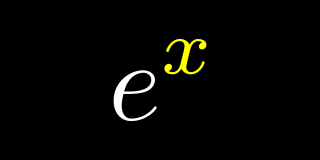

In [8]:
%%capture_png temp/example.png
%%manim $params
MathTex.set_default()
class Example(ZoomedScene):
    def construct(self):
        mob = MathTex(r"e^x",substrings_to_isolate="x")
        mob.set_color_by_tex("x", YELLOW)
        self.add(mob)
        self.camera.frame.scale(1/10)
###******

image_full_name = "MathTex2.png"
snippet = """
mob = MathTex(r"e^x",substrings_to_isolate="x")
mob.set_color_by_tex("x", YELLOW)
"""
name_snippet_pairs[image_full_name] = snippet

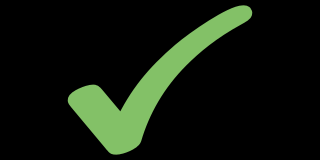

In [9]:
%%capture_png temp/example.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        check= Tex(r"\checkmark", color= GREEN, stroke_width=8).scale(3)
        check.stretch(0.8, dim = 1)
        check.stretch(1.1, dim = 0)
        self.camera.frame.scale(1/7)
        self.add(check)
image_full_name = "Check.png"
snippet = """
check= Tex(r"\checkmark", color= GREEN, stroke_width=8).scale(3)
check.stretch(0.8, dim = 1)
check.stretch(1.1, dim = 0)
"""
name_snippet_pairs[image_full_name] = snippet

In [10]:
# save here
file_name = "Mobjects_Text"
base_directory = temp_path
target_directory = Path.cwd() / "imgs"
target_directory.mkdir(parents=True, exist_ok=True)

prefix = file_name # delete files that where created in the past 
for file in target_directory.rglob("*"):
    if (prefix in file.name):
        file.unlink() 

paths = sorted(Path(base_directory).iterdir(), key=os.path.getmtime)
dest_names = list(name_snippet_pairs.keys())
new_keys = []
for num, (p,des) in enumerate(zip(paths,dest_names)):
    to_path = target_directory /  f"{file_name}_{num:03}_{des}"   
    shutil.copy(p,  to_path)
    new_keys.append(to_path.name)
new_name_snippet_pairs ={} 
new_values = list(name_snippet_pairs.values())

for key, value in zip(new_keys,new_values):
    if value.startswith("\n"):
        value = value[1:]
    if value.endswith("\n"):
        value = value[:-1]
    value += "\n"
    new_name_snippet_pairs[key]=value
with open(f'imgs/{file_name}.json', 'w') as fp:
    json.dump(new_name_snippet_pairs, fp,indent=2)
display(new_name_snippet_pairs)
!rm -r $base_directory
!git add .

{'Mobjects_Text_000_Text1.png': 'mob = Text("Hello", color=WHITE)\n',
 'Mobjects_Text_001_Text2.png': 'mob = Text("World", color=YELLOW,slant=ITALIC)\n',
 'Mobjects_Text_002_Underline.png': 't = Tex("YES")\nul = Underline(t, color=YELLOW)\n',
 'Mobjects_Text_003_Bold.png': 'mob = Text("NO", color=YELLOW,weight=BOLD)\n',
 'Mobjects_Text_004_MathTex.png': 'mob = MathTex(r"\\Psi(x)", color=WHITE)\n',
 'Mobjects_Text_005_MathTex_stix2.png': 'stix2 = TexTemplate()\nstix2.add_to_preamble(r"\\usepackage{stix2}", prepend= True)\nMathTex.set_default(tex_template=stix2)\nmob = MathTex(r"\\Psi(x)", color=WHITE)\n',
 'Mobjects_Text_006_MathTex2.png': 'mob = MathTex(r"e^x",substrings_to_isolate="x")\nmob.set_color_by_tex("x", YELLOW)\n',
 'Mobjects_Text_007_Check.png': 'check= Tex(r"\\checkmark", color= GREEN, stroke_width=8).scale(3)\ncheck.stretch(0.8, dim = 1)\ncheck.stretch(1.1, dim = 0)\n'}